In [96]:
%run functions_emc2_prep.py

In [97]:
## convert DHARMA output into EMC^2-friendly format
#dharma_for_emc2(PATH='/ccsopen/proj/atm133/dharma/Lx25km_dx200m_def_z0_def_zi/',PLT_times=['029549'])

In [98]:
## apply EMC^2
###model_path = '/ccsopen/proj/atm133/dharma/emc2_folder/emc2_prep.nc'
#model_path = '/ccsopen/proj/atm133/dharma/Lx25km_dx200m_def_z0_def_zi/emc2_prep_029549.nc'
###model_path = '/ccsopen/proj/atm133/dharma/Lx25km_dx200m_def_z0_def_zi/emc2_prep_004320.nc'
#dharma_out = emc2.core.model.DHARMA(file_path = model_path,time_dim="time",single_pi_class=False)
#full_ds = dharma_out.ds.copy(deep=True)


In [99]:
## convert a 3D DEPHY-style file into EMC^2-friendly format
#dephy_file = '/home/tflorian/nobackup/dharma_run/cao_2018/DHARMA_Lx25_dx100_ProgNa_nosub_L76_3D_28h.nc' #emc2_prep_041760.nc'
dephy_file = '/home/tflorian/nobackup/dharma_run/cao_2018/DHARMA_Lx25_dx100_ProgNa_somesub_3D_29h.nc' #emc2_prep_041760.nc'
dephy_for_emc2(FILE_IN = dephy_file)

dharma_out = emc2.core.model.DHARMA(file_path = os.path.splitext(dephy_file)[0] + "_dephy.nc",time_dim="time",single_pi_class=False)
full_ds = dharma_out.ds.copy(deep=True)


/home/tflorian/nobackup/dharma_run/cao_2018/DHARMA_Lx25_dx100_ProgNa_somesub_3D_29h.nc
/home/tflorian/nobackup/dharma_run/cao_2018/DHARMA_Lx25_dx100_ProgNa_somesub_3D_29h_dephy.nc
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    title: DHARMA LES results for COMBLE-MIP case: fixed Nd and Ni
    reference: https://github.com/ARM-Development/comble-mip
    authors: Florian Tornow (florian.tornow@nasa.gov) and Ann Fridlind (ann.fridlind@nasa.gov)
    version: 2025-05-19 08:42:37
    format_version: DEPHY-derivative
    script: convert_DHARMA_LES_output_to_dephy_format_3D.ipynb
    startDate: 2020-05-12 13:00:00.0
    force_geo: 1
    surfaceType: ocean (after spin-up)
    surfaceForcing: ts (after spin-up)
    dimensions(sizes): x(128), y(128), height(159), time(1)
    variables(dimensions): float64 x(x), float64 y(y), float64 height(height), float64 time(time), float64 pa(time, height), float64 ua(time, height, x, y), float64 va(ti

In [100]:
full_ds.qpi.max()

<xarray.DataArray 'qpi' ()> Size: 8B
array(0.00138255)

In [101]:
## ensure we extract an appropriate number of grid cells

t_target = 1.05 # hour
#windspeed = 12.25 # m/s - extracted from radiosonde values below 500 m
windspeed = 10.0 # m/s - extracted from radiosonde values below 500 m
horiz_res = 200 # m - needs to be adapted as simulations are swapped

## cells if angle was zero 
num_cells = int(windspeed*t_target*3600/horiz_res)


In [102]:
num_cells

189

In [103]:
KAZR_dharma = emc2.core.instruments.KAZR('awr')
MPL_dharma = emc2.core.instruments.HSRL()
CALIOP_dharma = emc2.core.instruments.CALIOP()

In [104]:
## determine average u and v wind components in lowest X m
max_hgt = 1000.
wind_sub = full_ds.sel(hgt=full_ds['hgt'][full_ds['hgt']<max_hgt])[('u_wind')]
u_ave = np.mean(wind_sub)
wind_sub = full_ds.sel(hgt=full_ds['hgt'][full_ds['hgt']<max_hgt])[('v_wind')]
v_ave = np.mean(wind_sub)

ew_dist = u_ave
ns_dist = v_ave
ve_dist = np.sqrt(ew_dist**2 + ns_dist**2)
b_ang = np.arctan(np.abs(ew_dist/ns_dist))*180/np.pi
print('Before')
print(b_ang.data)
if ns_dist<0:
    if ew_dist<0:
        b = +b_ang
    else:
        b = -b_ang
else:    
    if ew_dist<0:
        b = -b_ang
    else:
        b = b_ang
print('Angle')
print(b.data)    

## find indices for specific x (works but slow!)
#print(full_ds.copy(deep=True).isel({"time_lat_lon": [1]}))
#tll_vec = np.array([])
#for tll in range(len(full_ds['time_lat_lon'])):
#    if(full_ds.copy(deep=True).isel({"time_lat_lon": [tll]})['x'].data == -12650.):
#        tll_vec = np.concatenate((tll_vec,tll),axis=None)
#        print(tll_vec)

Before
74.46429978848919
Angle
-74.46429978848919


In [105]:
## for CALIPSO processing assume roughly the angle of intercept
#b = pd.DataFrame()
#b.data = 45.

In [106]:
ang_target = b.data
#ang_target = -73.598

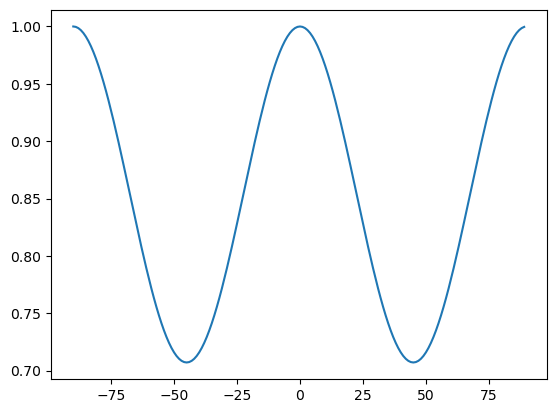

In [107]:
angi = np.arange(-90,90,1)
plt.plot(angi,(np.cos(angi/90*np.pi)**2)*(1 - np.cos(45/180*np.pi)) + np.cos(45/180*np.pi))

2200.0
-9555.599133445592
2400.0
-9611.198266891184
2600.0
-9666.797400336776
2800.0
-9722.396533782368
3000.0
-9777.99566722796
3200.0
-9833.594800673553
3400.0
-9889.193934119145
3600.0
-9944.793067564737
3800.0
-10000.392201010329
4000.0
-10055.99133445592
4200.0
-10111.590467901513
4400.0
-10167.189601347105
4600.0
-10222.788734792697
4800.0
-10278.38786823829
5000.0
-10333.987001683881
5200.0
-10389.586135129473
5400.0
-10445.185268575065
5600.0
-10500.784402020658
5800.0
-10556.38353546625
6000.0
-10611.982668911842
6200.0
-10667.581802357434
6400.0
-10723.180935803026
6600.0
-10778.780069248618
6800.0
-10834.37920269421
7000.0
-10889.978336139802
7200.0
-10945.577469585394
7400.0
-11001.176603030986
7600.0
-11056.775736476578
7800.0
-11112.37486992217
8000.0
-11167.974003367763
8200.0
-11223.573136813355
8400.0
-11279.172270258947
8600.0
-11334.771403704539
8800.0
-11390.370537150131
9000.0
-11445.969670595723
9200.0
-11501.568804041315
9400.0
-11557.167937486907
9600.0
-11612.7

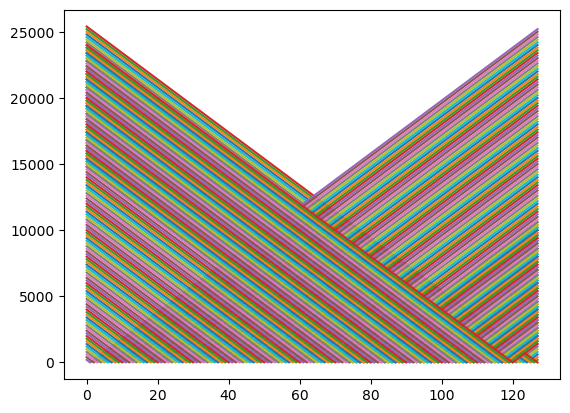

In [108]:
## new method to obtain line with displacement

dim_xy = int(np.sqrt(len(full_ds['time_lat_lon'])))

x_init = 5500.0
y_init = full_ds.copy(deep=True)['y'].min().data

y_target = -9500.0 #y_init
x_target = 12000.0 #x_init
x_target = 5000.0 #x_init
x_target = 2000.0 #x_init
#x_target = 9000.0 #x_init

## number of cells when accounting for angle
cor_factor = (np.cos(ang_target/90*np.pi)**2)*(1 - np.cos(45/180*np.pi)) + np.cos(45/180*np.pi)
num_cells_cor = int(cor_factor*num_cells)

tll_vec = np.array([])
for ii in range(num_cells_cor):

    ## identify row 
    y_ind = np.abs(full_ds.copy(deep=True).isel({"time_lat_lon": np.arange(0,dim_xy*dim_xy,dim_xy)})['y'] - y_target).argmin().data
    
    ## find values closest
    i_min = y_ind*dim_xy
    i_max = i_min + dim_xy
    x_diff = np.abs(full_ds.copy(deep=True).isel({"time_lat_lon": range(i_min,i_max)})['x'].data - x_target)
    tll_vec = np.concatenate((tll_vec,range(i_min,i_max)[x_diff.argmin()]),axis=None)
    plt.plot(x_diff)

    ## prepare next step
    if abs(horiz_res/np.tan(ang_target/180*np.pi)) > horiz_res:
        x_target += horiz_res*np.tan(ang_target/180*np.pi)
        y_target += horiz_res
    else:
        x_target += horiz_res
        y_target += horiz_res/np.tan(ang_target/180*np.pi)
    
    print(x_target)
    print(y_target)

    ## action when hitting boundaries
    if y_target > full_ds.copy(deep=True)['y'].max().data:
        y_target = full_ds.copy(deep=True)['y'].min().data
        #x_init += 1000
        #x_target = x_init 
        #x_target += 1000
    
    if y_target < full_ds.copy(deep=True)['y'].min().data:
        y_target = full_ds.copy(deep=True)['y'].max().data
        #x_init += 1000
        #x_target = x_init 
        #x_target += 1000
    
    if x_target < full_ds.copy(deep=True)['x'].min().data:
        x_target = full_ds.copy(deep=True)['x'].max().data - horiz_res
        
    if x_target > full_ds.copy(deep=True)['x'].max().data:
        x_target = full_ds.copy(deep=True)['x'].min().data + horiz_res


(-12800.0, 12600.0)

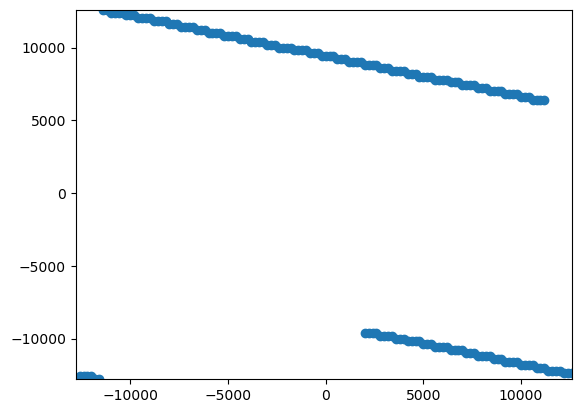

In [109]:
dharma_out.ds = full_ds.copy(deep=True).isel({"time_lat_lon": tll_vec.astype(int)})
plt.plot(dharma_out.ds['x'],dharma_out.ds['y'],'o')
plt.xlim(full_ds.copy(deep=True)['x'].min().data,full_ds.copy(deep=True)['x'].max().data)
plt.ylim(full_ds.copy(deep=True)['y'].min().data,full_ds.copy(deep=True)['y'].max().data)

<function matplotlib.pyplot.show(close=None, block=None)>

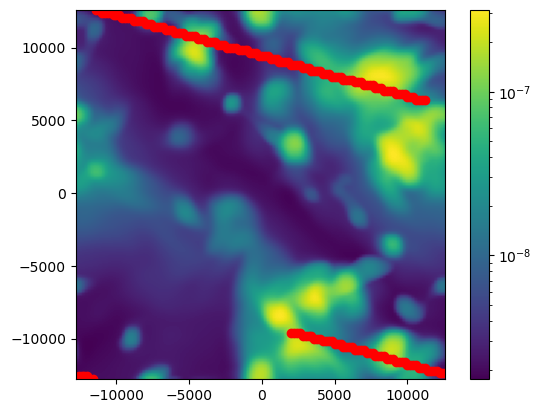

In [110]:
## subset points along line
dharma_out.ds = full_ds.copy(deep=True).isel({"time_lat_lon": tll_vec.astype(int)})

## produce statistic
dharma_stat = full_ds.sel(hgt=full_ds['hgt'][full_ds['hgt']<5000]).unstack().sum(dim=['hgt'])
#print(dharma_stat)
dharma_stat['all_cond'] = (dharma_stat['qcl'] + dharma_stat['qpl']+ dharma_stat['qci'] + dharma_stat['qpi'] + dharma_stat['qci'] + dharma_stat['qpir'])/dharma_stat['z']# 

## show selected points
plt.plot(dharma_out.ds['x'],dharma_out.ds['y'],'o',c='r')
plt.imshow(dharma_stat['all_cond'][:,:,0],norm=colors.LogNorm(),extent=[full_ds['x'].min(),full_ds['x'].max(),full_ds['y'].max(),full_ds['y'].min()])
#plt.gca().invert_yaxis()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.colorbar()
plt.show

#full_ds.sel(hgt=full_ds['hgt'][full_ds['hgt']<1000])


In [111]:
## check for missing values etc
full_ds.isnull().sum('time_lat_lon').sum('hgt')

<xarray.Dataset> Size: 2kB
Dimensions:         (y_tmp: 128, x_tmp: 128, time_tmp: 1)
Coordinates:
  * y_tmp           (y_tmp) float64 1kB -1.28e+04 -1.26e+04 ... 1.26e+04
  * x_tmp           (x_tmp) float64 1kB -1.28e+04 -1.26e+04 ... 1.26e+04
  * time_tmp        (time_tmp) int64 8B 0
Data variables: (12/23)
    z               int64 8B 0
    u_wind          int64 8B 0
    v_wind          int64 8B 0
    w_wind          int64 8B 0
    qcl             int64 8B 0
    qci             int64 8B 0
    ...              ...
    strat_cl_frac   int64 8B 0
    strat_ci_frac   int64 8B 0
    strat_pl_frac   int64 8B 0
    strat_pi_frac   int64 8B 0
    strat_pir_frac  int64 8B 0
    conv_dat        int64 8B 0

In [112]:
emc2_out_path = '/ccsopen/proj/atm133/dharma/emc2_folder/dharma_out/'
use_rad_logic = False
mie_for_ice = True
fields_to_grab_td = ["COSP_phase_mask_all_hyd", "phase_mask_HSRL_all_hyd", "ext_mask", "sub_col_beta_att_tot", "sub_col_OD_tot"]

dharma_out.ds = full_ds.copy(deep=True).isel({"time_lat_lon": tll_vec.astype(int)})
#dharma_out.ds = full_ds.copy(deep=True).isel({"time_lat_lon": [x+40000 for x in range(0,255,5)]})
#dharma_out.ds = full_ds.copy(deep=True).isel({"time_lat_lon": range(0,len(full_ds['time_lat_lon'])-1,256)}) 

print(dharma_out.ds.qpi.max())
# run EMC^2
print("run EMC^2")

print("KAZR processing (+ adding vertical motion to V_d")    
dharma_out = emc2.simulator.main.make_simulated_data(dharma_out, KAZR_dharma, 1, do_classify=True, convert_zeros_to_nan=True, use_rad_logic=use_rad_logic,mie_for_ice=mie_for_ice)
dharma_out.ds["sub_col_Vd_tot"] = dharma_out.ds["sub_col_Vd_tot_strat"].copy(deep=True) + dharma_out.ds["w_wind"]
dharma_out.ds["sub_col_sigma_d_tot"] = dharma_out.ds["sub_col_sigma_d_tot_strat"].copy(deep=True)
    
print("MPL processing ")    
dharma_out = emc2.simulator.main.make_simulated_data(dharma_out, MPL_dharma, 1, do_classify=True, convert_zeros_to_nan=True, use_rad_logic=use_rad_logic,mie_for_ice=mie_for_ice)

print(dharma_out.ds.qpi.max())
#print("CALIOP processing (+ grabbing topdown fields prior to MPL processing")
#dharma_out = emc2.simulator.main.make_simulated_data(dharma_out, CALIOP_dharma, 1, do_classify=True, convert_zeros_to_nan=True,
#                                                         use_rad_logic=use_rad_logic, skip_subcol_gen=True, mie_for_ice=mie_for_ice)

for field in fields_to_grab_td:
    dharma_out.ds[field + "_topdown"] = dharma_out.ds[field].copy(deep=True)
    
    #print("MPL processing")
    #dharma_out = emc2.simulator.main.make_simulated_data(dharma_out, MPL_dharma, 1, do_classify=True, convert_zeros_to_nan=True,
    #                                                         use_rad_logic=use_rad_logic, skip_subcol_gen=True, mie_for_ice=mie_for_ice)

tmp_ds = dharma_out.ds.copy(deep=True)


<xarray.DataArray 'qpi' ()> Size: 8B
array(0.00098348)
run EMC^2
KAZR processing (+ adding vertical motion to V_d
## Creating subcolumns...
No convective processing for DHARMA
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns frac fields to 1 for startiform cl and ci based on q > 0. kg/kg
Done! total processing time = 0.00s
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns frac fields to 1 for strat precip based on q > 0. kg/kg
Done! total processing time = 0.00s
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns q (and N micro logic) fields for cl equal to grid-cell mean
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns q (and N micro logic) fields for ci equal to grid-cell mean
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns q (and N micro logic) fields for pl equal to grid-cell mean
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns q (and N micro

In [113]:
#cor_factor = (np.cos(ang_target/90*np.pi)**2)*(1 - np.cos(45/180*np.pi)) + np.cos(45/180*np.pi)
#print(cor_factor)

if abs(horiz_res/np.tan(ang_target/180*np.pi)) > horiz_res:
    cor_factor = 1/np.sqrt(1 + np.tan(ang_target/180*np.pi)**2)
else:
    cor_factor = 1/np.sqrt(1 + (1/np.tan(ang_target/180*np.pi))**2)
cor_factor

np.float64(0.9634637536076971)

In [114]:

## make up new variable
#cor_factor = (np.cos(ang_target/90*np.pi)**2)*(1 - np.cos(45/180*np.pi)) + np.cos(45/180*np.pi)
time_vec = np.arange(0,len(tmp_ds.time_lat_lon.data),1)*horiz_res/cor_factor/windspeed/3600

In [115]:
## reorganize data to avoid artifacts when working with looped version
for itime in range(len(tmp_ds.time_lat_lon)):
    tmp_sub = tmp_ds.isel(time_lat_lon = itime).drop_vars(['time_lat_lon','x_tmp','y_tmp'])
    tmp_sub = tmp_sub.assign_coords({'time_tmp': np.int64(tmp_sub.time_tmp + 3600*time_vec[itime])})
    if itime==0:
        tmp_ds_new = xr.concat([tmp_sub],dim='time_tmp')
    else:
        tmp_ds_new = xr.concat([tmp_ds_new,tmp_sub],dim='time_tmp')
    #print(tmp_ds_new)

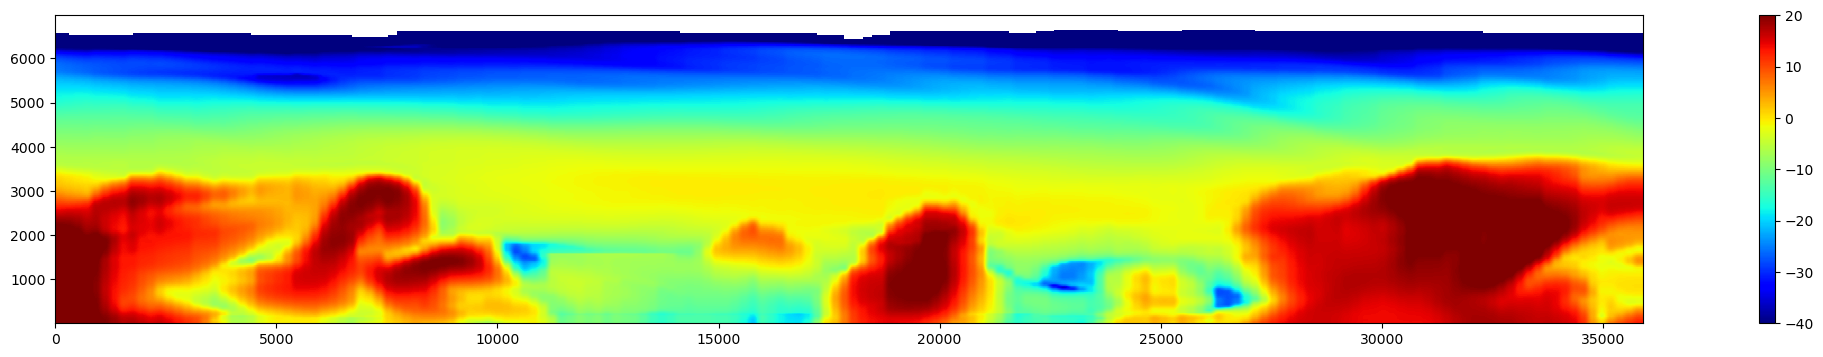

In [116]:
#tmp_ds.sel(subcolumn=0).sel(x_tmp=50.)
#np.unique(tmp_ds.x_tmp)

x = tmp_ds_new.sel(subcolumn=0).time_tmp*10
y = tmp_ds_new.sel(subcolumn=0).hgt

plt.figure(figsize = (30,4))
plt.imshow(tmp_ds_new.sel(subcolumn=0)['sub_col_Ze_tot'].transpose(), # norm=colors.LogNorm(), 
           cmap=plt.cm.jet,extent =[x.min(), x.max(), y.max(), y.min()], vmin=-40, vmax=20)
#model_display = act.plotting.TimeSeriesDisplay(tmp_ds.sel(subcolumn=0).sel(x_tmp=50.), figsize=(15,5))
#@model_display.plot('q', cmap='act_HomeyerRainbow', vmin=-30, vmax=-15)
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.colorbar()

Text(0.5, 0.98, 'EMC$^2$ applied to LES ')

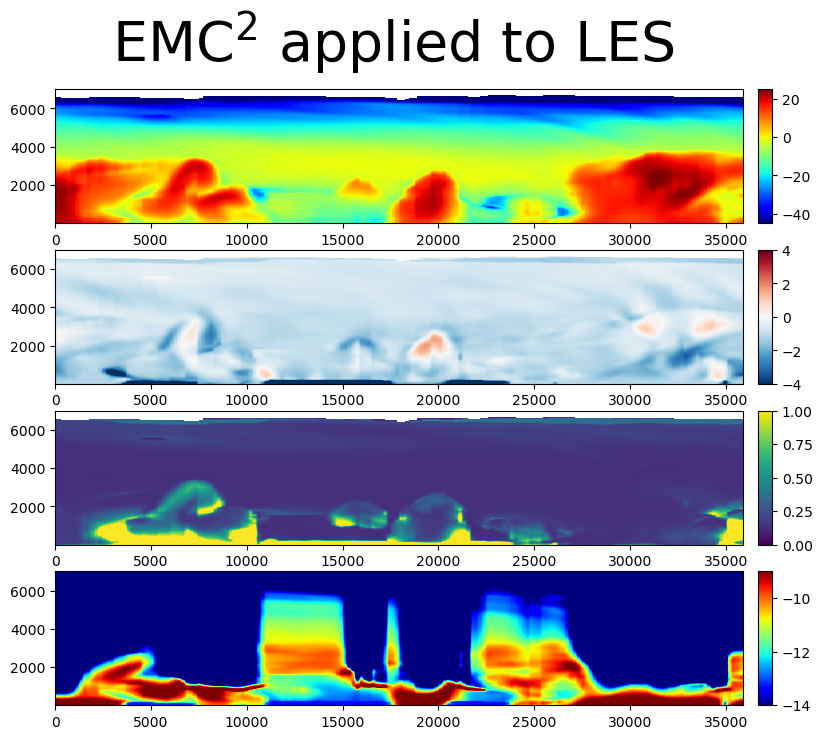

In [117]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator

fig, axs = plt.subplots(ncols=1,nrows=4, figsize=(12, 12))
fig.set_figwidth(15)
fig.set_figheight(8)

H_MAX = 7000.0

im0 = axs[0].imshow(tmp_ds.sel(subcolumn=0).sel(hgt=slice(0.0,H_MAX))['sub_col_Ze_tot'].transpose(), # norm=colors.LogNorm(), 
           cmap='jet',extent =[x.min(), x.max(), H_MAX, y.min()], vmin=-45, vmax=25,aspect=1)
axs[0].invert_yaxis()
#axs[0].invert_xaxis()

divider0 = make_axes_locatable(axs[0])
cax0 = divider0.append_axes("right", size="2%", pad=0.15)
cbar0 = plt.colorbar(im0, cax=cax0)

im1 = axs[1].imshow(tmp_ds.sel(subcolumn=0).sel(hgt=slice(0.0,H_MAX))['sub_col_Vd_tot'].transpose(), # norm=colors.LogNorm(), 
           cmap='RdBu_r',extent =[x.min(), x.max(), H_MAX, y.min()], vmin=-4, vmax=4,aspect=1)
axs[1].invert_yaxis()
#axs[1].invert_xaxis()

divider1 = make_axes_locatable(axs[1])
cax1 = divider1.append_axes("right", size="2%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1)

im2 = axs[2].imshow(tmp_ds.sel(subcolumn=0).sel(hgt=slice(0.0,H_MAX))['sub_col_sigma_d_tot'].transpose(), # norm=colors.LogNorm(), 
           cmap='viridis',extent =[x.min(), x.max(), H_MAX, y.min()], vmin=0, vmax=1,aspect=1)
axs[2].invert_yaxis()
#axs[2].invert_xaxis()

divider2 = make_axes_locatable(axs[2])
cax2 = divider2.append_axes("right", size="2%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2)

im3 = axs[3].imshow(np.log(tmp_ds.sel(subcolumn=0).sel(hgt=slice(0.0,H_MAX))['sub_col_beta_att_tot']).transpose(), # norm=colors.LogNorm(), 
           cmap='jet',extent =[x.min(), x.max(), H_MAX, y.min()], vmin=-14, vmax=-9,aspect=1)
axs[3].invert_yaxis()
#axs[3].invert_xaxis()

divider3 = make_axes_locatable(axs[3])
cax3 = divider3.append_axes("right", size="2%", pad=0.15)
cbar3 = plt.colorbar(im3, cax=cax3)


fig.suptitle('EMC$^2$ applied to LES ', fontsize=40)

In [118]:

#cor_factor = (np.cos(ang_target/90*np.pi)**2)*(1 - np.cos(45/180*np.pi)) + np.cos(45/180*np.pi)
## make up new variable
time_vec = np.arange(0,len(tmp_ds.time_lat_lon.data),1)*horiz_res/cor_factor/windspeed/3600

In [119]:
## create a new xarray and redefine coordinates

tmp_new_1 = xr.DataArray(data=tmp_ds_new.sortby('time_tmp').sel(subcolumn=0).sub_col_Ze_tot.data,
                       dims=['time','height'],
                       coords = dict(
                           #dist = (['dist'], tmp_ds.y_tmp.data),
                           time = (['time'], time_vec),
                           height = (['height'],tmp_ds.hgt.data)),
                       attrs = dict(
                           description = 'KAZR',
                           long_name = '$Z_e$',
                           units = 'dBZ'))

tmp_new_2 = xr.DataArray(data=tmp_ds.sel(subcolumn=0).sub_col_Vd_tot.data,
                       dims=['time','height'],
                       coords = dict(
                           time = (['time'], time_vec),
                           height = (['height'],tmp_ds.hgt.data)),
                       attrs = dict(
                           description = 'KAZR',
                           long_name = '$V_D$',
                           units = '$m s^{-1}$'))

tmp_new_3 = xr.DataArray(data=tmp_ds.sel(subcolumn=0).sub_col_sigma_d_tot.data,
                       dims=['time','height'],
                       coords = dict(
                           time = (['time'], time_vec),
                           height = (['height'],tmp_ds.hgt.data)),
                       attrs = dict(
                           description = 'KAZR',
                           long_name = '$\sigma_D$',
                           units = '$m s^{-1}$'))

tmp_new_4 = xr.DataArray(data=tmp_ds.sel(subcolumn=0).sub_col_beta_att_tot.data,
                       dims=['time','height'],
                       coords = dict(
                           time = (['time'], time_vec),
                           height = (['height'],tmp_ds.hgt.data)),
                       attrs = dict(
                           description = 'MPL',
                           long_name = '$ \\beta_{att} $',
                           units = '$m^{-1}$ sr$^{-1}$'))

tmp_new_1 = tmp_new_1.to_dataset(name='sub_col_Ze_tot')
tmp_new_2 = tmp_new_2.to_dataset(name='sub_col_Vd_tot')
tmp_new_3 = tmp_new_3.to_dataset(name='sub_col_sigma_d_tot')
tmp_new_4 = tmp_new_4.to_dataset(name='sub_col_beta_att_tot')

tmp_new = xr.merge([tmp_new_1,tmp_new_2,tmp_new_3,tmp_new_4])
#tmp_new.sel(height=slice(0,100))

Text(0.5, 1.0, 'cao_2018/DHARMA_Lx25_dx100_ProgNa_somesub_3D_29h.nc')

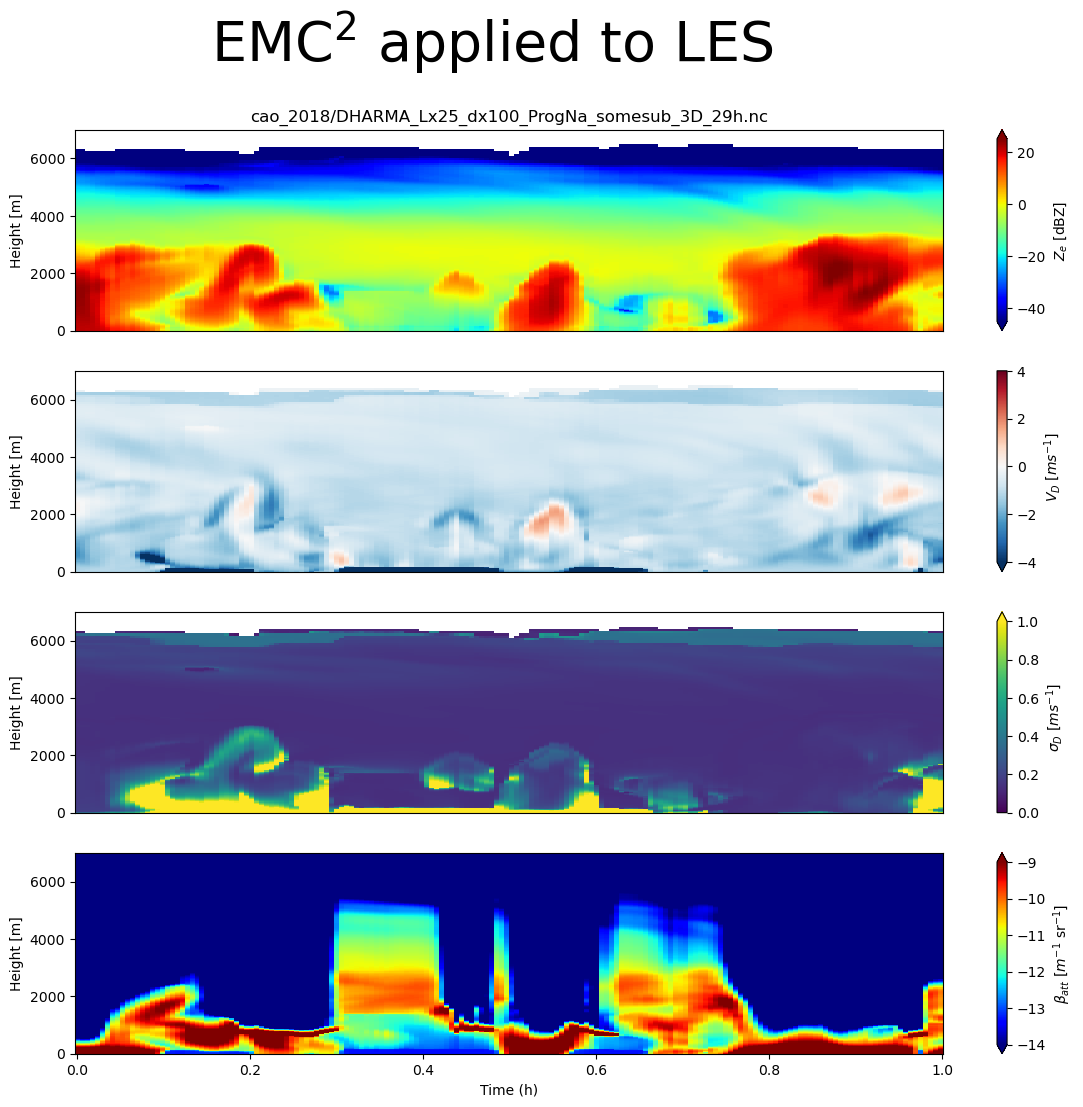

In [120]:
## display fields

fig, axs = plt.subplots(ncols=1,nrows=4, figsize=(12, 12))
fig.set_figwidth(14)
fig.set_figheight(12)

tmp_new.sel(height=slice(0.0,7000.0))['sub_col_Ze_tot'].plot(x='time',y='height',vmin=-45,vmax=25,cmap='jet',ax=axs[0])
tmp_new.sel(height=slice(0.0,7000.0))['sub_col_Vd_tot'].plot(x='time',y='height',vmin=-4,vmax=4,cmap='RdBu_r',ax=axs[1])
tmp_new.sel(height=slice(0.0,7000.0))['sub_col_sigma_d_tot'].plot(x='time',y='height',vmin=0,vmax=1,cmap='viridis',ax=axs[2])
np.log(tmp_new.sel(height=slice(0.0,7000.0))['sub_col_beta_att_tot']).plot(x='time',y='height',vmin=-14,vmax=-9,cmap='jet',ax=axs[3])
#np.log(mpl_dat.sel(range_bins=slice(27.25,32.25))['signal_return_co_pol']).plot(x='time',vmin=-2,vmax=1,cmap='jet',ax=axs[3])
#np.log(mpl_masked.sel(range_bins=slice(27.1,32.1))['signal_return_cross_pol']).plot(x='time',y='range',vmin=-2,vmax=1.5,cmap='jet',ax=axs[3])

## update labels etc
axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[2].set_xlabel('')
axs[3].set_xlabel('Time (h)')

axs[0].set_xticks([])
axs[1].set_xticks([])
axs[2].set_xticks([])

axs[0].set_title('')
axs[1].set_title('')
axs[2].set_title('')

axs[0].set_ylabel('Height [m]')
axs[1].set_ylabel('Height [m]')
axs[2].set_ylabel('Height [m]')
axs[3].set_ylabel('Height [m]')

fig.suptitle('EMC$^2$ applied to LES             ', fontsize=40)
axs[0].set_title(dephy_file.split('/')[5] + '/' + dephy_file.split('/')[6], fontsize=12) 


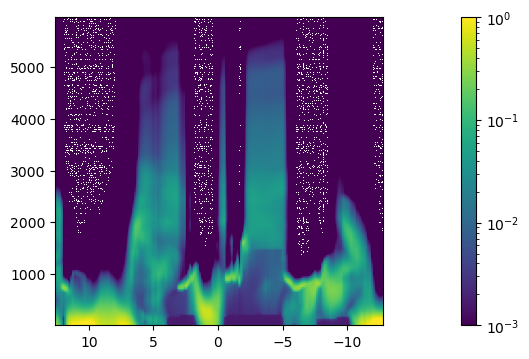

In [121]:
## show CALIPSO equivalent

tmp_ds_sub = tmp_ds.where(tmp_ds.z < 6000,drop=True)

x = tmp_ds_sub.sel(subcolumn=0).x_tmp/1000
y = tmp_ds_sub.sel(subcolumn=0).hgt

plt.figure(figsize = (20,4))
plt.imshow(tmp_ds_sub.sel(subcolumn=0)['sub_col_beta_att_tot_topdown'].transpose()*1000, norm=colors.LogNorm(vmin=10e-4, vmax=10e-1), 
           extent =[x.min(), x.max(), y.max(), y.min()],aspect=4/1000) #, vmin=10e-3, vmax=10e-1)
#model_display = act.plotting.TimeSeriesDisplay(tmp_ds.sel(subcolumn=0).sel(x_tmp=50.), figsize=(15,5))
#@model_display.plot('q', cmap='act_HomeyerRainbow', vmin=-30, vmax=-15)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.colorbar()


In [122]:
int(full_ds.dims["x_tmp"] / crop_x_quants)

NameError: name 'crop_x_quants' is not defined

In [ ]:
10e-6

In [ ]:
tll_vec.astype(int)
full_ds.copy(deep=True).isel({"time_lat_lon": tll_vec.astype(int)})

In [ ]:
tmp_ds.time_lat_lon.data

In [ ]:
emc2_out_path = '/ccsopen/proj/atm133/dharma/emc2_folder/dharma_out/'
use_rad_logic = False
mie_for_ice = True
fields_to_grab_td = ["COSP_phase_mask_all_hyd", "phase_mask_HSRL_all_hyd", "ext_mask", "sub_col_beta_att_tot", "sub_col_OD_tot"]

dharma_out.ds = full_ds.copy(deep=True).isel({"time_lat_lon": tll_vec.astype(int)})

# run EMC^2
print("run EMC^2")

print("KAZR processing (+ adding vertical motion to V_d")    
dharma_out = emc2.simulator.main.make_simulated_data(dharma_out, KAZR_dharma, 1, do_classify=True, convert_zeros_to_nan=True, use_rad_logic=use_rad_logic,mie_for_ice=mie_for_ice)
dharma_out.ds["sub_col_Vd_tot"] = dharma_out.ds["sub_col_Vd_tot_strat"].copy(deep=True) + dharma_out.ds["w_wind"]
dharma_out.ds["sub_col_sigma_d_tot"] = dharma_out.ds["sub_col_sigma_d_tot_strat"].copy(deep=True)
    
print("MPL processing ")    
dharma_out = emc2.simulator.main.make_simulated_data(dharma_out, MPL_dharma, 1, do_classify=True, convert_zeros_to_nan=True, use_rad_logic=use_rad_logic,mie_for_ice=mie_for_ice)
    

In [ ]:
tmp_ds.sel(subcolumn=0)['hgt']

In [ ]:
#print(tmp_ds)

tmp_ds = dharma_out.ds.copy(deep=True)
#tmp_ds.sel(subcolumn=0).sel(x_tmp=50.)
#np.unique(tmp_ds.x_tmp)

x = tmp_ds.sel(subcolumn=0)['y_tmp']
y = tmp_ds.sel(subcolumn=0)['hgt']#tmp_ds.sel(subcolumn=0).sel(x_tmp=50.).hgt

plt.figure(figsize = (30,4))
plt.imshow(tmp_ds.sel(subcolumn=0)['sub_col_Ze_tot'].transpose(), # norm=colors.LogNorm(), 
           cmap=plt.cm.jet,extent =[x.min(), x.max(), y.max(), y.min()], vmin=-40, vmax=20)
#model_display = act.plotting.TimeSeriesDisplay(tmp_ds.sel(subcolumn=0).sel(x_tmp=50.), figsize=(15,5))
#@model_display.plot('q', cmap='act_HomeyerRainbow', vmin=-30, vmax=-15)
plt.gca().invert_yaxis()
plt.colorbar()

In [ ]:
dharma_out.ds.qpi.max()

In [ ]:
dephy_file.split('/')[5] + '/' + dephy_file.split('/')[6]

In [ ]:
## old code

import pylab as pl
from IPython import display

print('---fast version of finding along-wind points--')
x0 = -1000.
y0 = -1000.

## check each x-val
ang_target = b.data
print(ang_target)
y_loop = num_cells #np.int(np.sqrt(len(full_ds['time_lat_lon'])))
y_len = np.int(np.sqrt(len(full_ds['time_lat_lon'])))*2
tll_vec = np.array([])
#full_ds.copy(deep=True).isel({"time_lat_lon": [1,2,3]})
nudger = 0
for y in range(y_loop):
    
    y_use = y - nudger*np.int(np.sqrt(len(full_ds['time_lat_lon'])))
    
    if (y_loop*(y_use) >= len(full_ds['time_lat_lon'])) | (y_loop*(y_use+1) >= len(full_ds['time_lat_lon'])):
        print('nudge!')
        #nudger += 1
        x0 += 1000.
        y0 += 1000.
    
    y_use = y - nudger*np.int(np.sqrt(len(full_ds['time_lat_lon'])))
    i_min = y_len*(y_use)
    i_max = y_len*(y_use+1)
    
    print(str(i_min) + '____' + str(i_max))
    
    x_vals = full_ds.copy(deep=True).isel({"time_lat_lon": range(i_min,i_max)})['x'].data 
    y_vals = full_ds.copy(deep=True).isel({"time_lat_lon": range(i_min,i_max)})['y'].data
    ang = np.arctan(np.abs((x_vals-x0)/(y_vals[0]-y0)))*180/np.pi
    ang[(x_vals<0) & (y_vals<0)] = ang[(x_vals<0) & (y_vals<0)]
    ang[(x_vals>0) & (y_vals<0)] = -ang[(x_vals>0) & (y_vals<0)]
    ang[(x_vals<0) & (y_vals>0)] = -ang[(x_vals<0) & (y_vals>0)]
    ang = np.arctan2((x_vals-x0),(y_vals[0]-y0))*180/np.pi
    ang_diff = np.abs(ang - ang_target)
    #print(x_vals[ang_diff.argmin()])
    #print(range(i_min,i_max)[ang_diff.argmin()])
    tll_vec = np.concatenate((tll_vec,range(i_min,i_max)[ang_diff.argmin()]),axis=None)
    
    dharma_out.ds = full_ds.copy(deep=True).isel({"time_lat_lon": tll_vec.astype(int)})    
    pl.plot(dharma_out.ds['x'],dharma_out.ds['y'],'o')
    #pl.plot(ang_diff)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.01)

In [ ]:
emc2.core.model.DHARMA